## Data Reading

First, we are just going to read the information of the paleamagnetic poles. This notebook creates proccessed versions of the PP and VGPs data in a python-friendly format. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#import cartopy.crs as ccrs
import seaborn as sns

from scripts.auxiliar import get_files_in_directory, spherical2cartesian

We first define the current path we are currently working on and define the directories of the data files with respect to it. 

In [43]:
current_path = os.getcwd() 
data_path = current_path + '/data'
data_path_PP = data_path + "/poles_NAM"
file_name = "/NAM_poles_0_130.xlsx"

In [44]:
df_NAM = pd.read_excel(data_path_PP + file_name)

calculate cartesian coordinates

In [45]:
df_NAM["x"] = df_NAM.apply(lambda row: spherical2cartesian(row.slat, row.slon)[0], axis=1)
df_NAM["y"] = df_NAM.apply(lambda row: spherical2cartesian(row.slat, row.slon)[1], axis=1)
df_NAM["z"] = df_NAM.apply(lambda row: spherical2cartesian(row.slat, row.slon)[2], axis=1)

In [46]:
df_NAM.head(2)

,name,min_age,max_age,age,slat,slon,N,k,alpha95,dp,...,Euler_lat,Euler_lon,Euler_ang,author,Q,reliability,age constraints,x,y,z
0,USGS SW North America composite,0.0,1.0,0.5,36.30,242.13,38,24.7,4.8,NaN,...,0.0,0.0,0.0,Mankinen (2008),5,NaN,Brunhes normal chron,-0.166445,-0.038510,-0.985298
1,Michoacan Guanajuato volcanic ﬁeld,0.0,0.6,0.3,19.25,257.67,8,29.0,9.1,8.5,...,79.2,23.0,0.2,Maciel Peña et al. (2009),5,NaN,Ar-Ar ages of 82 to 612 ka (from another study),0.919264,0.054671,0.389827


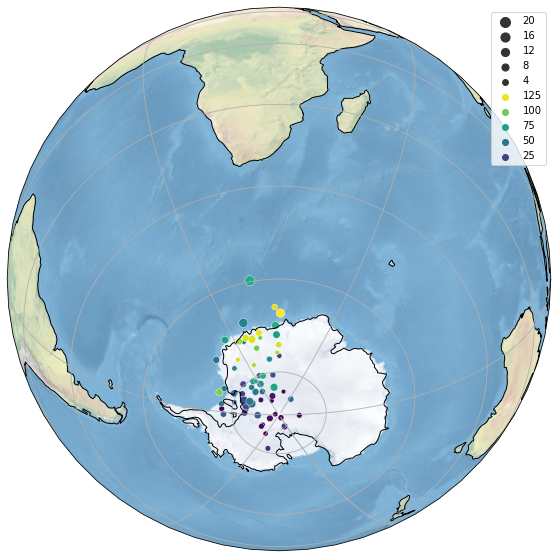

In [6]:
fig = plt.figure(figsize=(20,10))

proj = ccrs.Orthographic(30, -60)#Robinson()

ax = plt.axes(projection=proj)    
ax.coastlines()
ax.stock_img()
ax.gridlines()

sns.scatterplot(x = df_NAM['plon'], y = df_NAM['plat'],
                hue = df_NAM['age'],  size = (df_NAM['max_age'] - df_NAM['min_age']) , sizes=(20, 100),
                palette="viridis",
                transform = ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
plt.show()

### Reading the Virtual Geoomagnetic Poles (VGP)

Here we read all the VGPs data we have in the folder and we concatenate all the information into one single table

In [37]:
data_path_VGP = current_path + "/data/VGPs_NAM"

# this reads the names of all the files in the data path foldel we have
files_names = get_files_in_directory(data_path_VGP)

In [51]:
dfs = []

for fname in files_names:      
    
    print(fname)
    
    # Here we need to decide if we read cvs or excel
    #df_tmp = pd.read_excel(fname, skiprows = 5)
    df_tmp = pd.read_csv(fname, skiprows = 5)
    
    df_tmp.insert(0, 'pole_id', fname.replace('.', '/').split('/')[-2])
    df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0]+1))
    dfs.append(df_tmp)

df = pd.concat(dfs, ignore_index=True)
df

/Users/facundosapienza/Dropbox/CEED/Young_CEED_2.0/data/VGPs_NAM/2_Michoacan_Guanajuato_volcanic_ﬁeld.csv


,pole_id,vgp_id,Name,slat,slon,n,dec,inc,k,α95,...,A95,age,min_age,max_age,error_dist,lithology,Q,ref,age ref,comments (Q breakdown)
0,2_Michoacan_Guanajuato_volcanic_ﬁeld,1,Tan2 (TV),19.416194,-102.304861,8,353.5,43.5,199,3.9,...,NaN,0.209,0.168,0.250,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
1,2_Michoacan_Guanajuato_volcanic_ﬁeld,2,Tan3 (UR-4),19.374361,-102.091028,8,339.9,60.9,242,3.6,...,NaN,0.429,0.365,0.493,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
2,2_Michoacan_Guanajuato_volcanic_ﬁeld,3,Tan6 (Tan26),19.425722,-102.435528,7,17.9,58.6,41,9.6,...,NaN,0.256,0.238,0.274,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
3,2_Michoacan_Guanajuato_volcanic_ﬁeld,4,Tan7 (Tan10),19.308889,-102.539583,6,348.6,28.1,115,6.3,...,NaN,0.373,0.312,0.434,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
4,2_Michoacan_Guanajuato_volcanic_ﬁeld,5,Tan8 (Tan43),19.261861,-102.564056,8,2.5,27.7,359,2.9,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
5,2_Michoacan_Guanajuato_volcanic_ﬁeld,6,Tan9 (Tan 43),19.268194,-102.569011,8,352.7,31.3,39,9.2,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
6,2_Michoacan_Guanajuato_volcanic_ﬁeld,7,Tan10 (NI 19),19.164556,-102.215750,7,1.2,32.8,69,7.3,...,NaN,0.820,0.580,106.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
7,2_Michoacan_Guanajuato_volcanic_ﬁeld,8,Tan11 (NI 18),19.010250,-102.067639,7,349.3,43.6,189,4.3,...,NaN,0.163,0.126,200.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN


And now we just save the data as single csv file:

In [53]:
df.to_csv(data_path + "/VGPs.csv", index=False)